## WALS hyperparameters on Movielens

In [2]:
#%load_ext watermark
%load_ext autoreload 
%autoreload 2

In [3]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
import itertools
import scipy.sparse as ss
import pathos.multiprocessing as mp
import tqdm

In [4]:
from pybpr import *
from wals_hyperparameters_ml_run import get_ndcg_wals

In [5]:
%%time
#df = load_movielens_data('ml-1m')
df = load_movielens_data('ml-100k')
dfshort = df[df['rating'] > 0]
df.head()

CPU times: user 18.8 ms, sys: 10.7 ms, total: 29.5 ms
Wall time: 91.8 ms


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
df = pd.read_csv(os.path.join(os.path.curdir, 'output', 'ml100k_wals_results.csv'), index_col=0)

In [7]:
df

,num_features,wgt_strategy,ndcg_num_items,num_iters,reg_lambda,initial_std,test_ratio,ndcg_test,ndcg_train
0,2,same,10,20,0.0,0.01,0.2,0.292147,0.523141
1,2,same,10,20,2.0,0.01,0.2,0.291702,0.523484
2,2,same,10,20,5.0,0.01,0.2,0.292662,0.523811
3,2,same,10,30,0.0,0.01,0.2,0.291996,0.523306
4,2,same,10,30,2.0,0.01,0.2,0.292096,0.523154
...,...,...,...,...,...,...,...,...,...
475,59,item-oriented,10,20,2.0,0.01,0.2,0.380874,0.805583
476,59,item-oriented,10,20,5.0,0.01,0.2,0.395671,0.781991
477,59,item-oriented,10,30,0.0,0.01,0.2,0.366798,0.809774
478,59,item-oriented,10,30,2.0,0.01,0.2,0.384497,0.804695


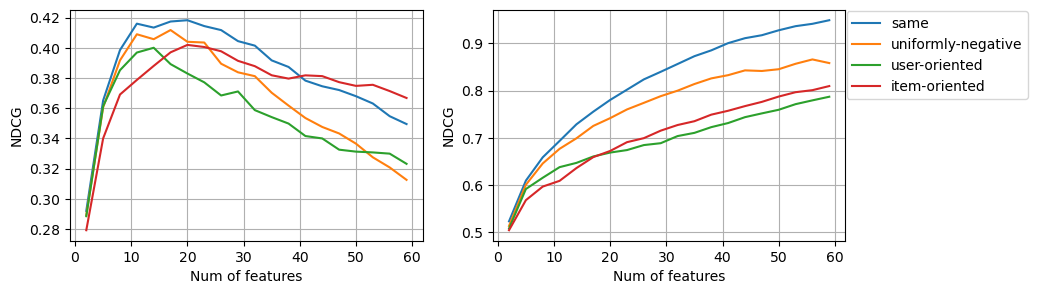

In [15]:
ibool = (df['ndcg_num_items']==10) & (df['num_iters']==30) & (df['reg_lambda']==0.)
fig, ax = plt.subplots(1, 2, figsize=(10,3))
for wgt_strategy in df.wgt_strategy.unique():
    idf = df[(df['wgt_strategy']==wgt_strategy) & ibool]
    ax[0].plot(idf['num_features'], idf['ndcg_test'], label=f'{wgt_strategy}')
    ax[1].plot(idf['num_features'], idf['ndcg_train'], label=f'{wgt_strategy}')
    ax[1].legend(loc=2, borderaxespad=0.1, bbox_to_anchor=(1.0, 1.0))
for iax in ax:
    iax.grid(True)
    #iax.set_ylim([0, 1])
    iax.set_ylabel('NDCG')
    iax.set_xlabel('Num of features')
    #iax.legend(loc=2, borderaxespad=0.1)
# ibool = (df['ndcg_num_items']==10) & (df['num_iters']==10) & (df['reg_lambda']==5.)
# for wgt_strategy in df.wgt_strategy.unique():
#     idf = df[(df['wgt_strategy']==wgt_strategy) & ibool]
#     ax[0].plot(idf['num_features'], idf['ndcg_test'], label=f'{wgt_strategy}')
#     ax[1].plot(idf['num_features'], idf['ndcg_train'], label=f'{wgt_strategy}')
#     ax[1].legend(loc=2, borderaxespad=0.1, bbox_to_anchor=(1.0, 1.0))
# for iax in ax:
#     iax.grid(True)
#     #iax.set_ylim([0, 1])
#     iax.set_ylabel('NDCG')
#     iax.set_xlabel('Num of features')
#     #iax.legend(loc=2, borderaxespad=0.1)
    

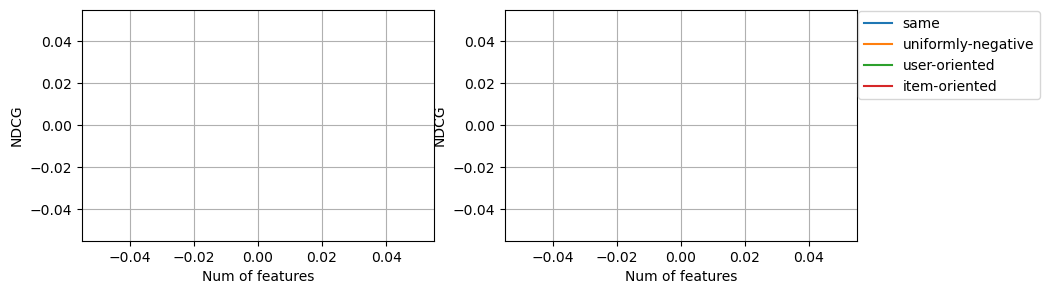

In [9]:
ibool = (df['ndcg_num_items']==10) & (df['num_iters']==20) & (df['reg_lambda']==1.)
fig, ax = plt.subplots(1, 2, figsize=(10,3))
for wgt_strategy in df.wgt_strategy.unique():
    idf = df[(df['wgt_strategy']==wgt_strategy) & ibool]
    ax[0].plot(idf['num_features'], idf['ndcg_test'], label=f'{wgt_strategy}')
    ax[1].plot(idf['num_features'], idf['ndcg_train'], label=f'{wgt_strategy}')
    ax[1].legend(loc=2, borderaxespad=0.1, bbox_to_anchor=(1.0, 1.0))
for iax in ax:
    iax.grid(True)
    #iax.set_ylim([0, 1])
    iax.set_ylabel('NDCG')
    iax.set_xlabel('Num of features')
    #iax.legend(loc=2, borderaxespad=0.1)

In [14]:
df.columns

Index(['num_features', 'wgt_strategy', 'ndcg_num_items', 'num_iters',
       'reg_lambda', 'initial_std', 'test_ratio', 'ndcg_test', 'ndcg_train'],
      dtype='object')

In [19]:
df.test_ratio.unique(), df.initial_std.unique(), df.reg_lambda.unique(), df.num_iters.unique()

(array([0.2]), array([0.01]), array([0., 1.]), array([10, 20]))

In [25]:
df.ndcg_num_items.unique()

array([ 5, 10])